In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import geopandas as gpd 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


In [2]:
# Using code from https://medium.com/@jl_ruiz/plot-maps-from-the-us-census-bureau-using-geopandas-and-contextily-in-python-df787647ef77
path = "/data/keeling/a/sf20/b/wrf_partmc/WRFV3/test/em_les/notebooks/shapefiles/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
# shapefile from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
us_shp = gpd.read_file(path)
us_shp = us_shp.to_crs("EPSG:4326")
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = us_shp
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

In [3]:
def reduce_res(input_array, divx, divy):
    division_factor = np.array([divx, divy])
    # the line of code below is from https://www.youtube.com/watch?v=-3InzkyBJ_s 
    reduced_res_array = input_array.reshape(np.column_stack([input_array.shape//division_factor, division_factor]).ravel()).mean(axis=tuple(range(1, len(division_factor)*2, 2)))
    reduced_upscaled = np.kron(reduced_res_array, np.ones((divx, divy)))
    return reduced_upscaled

#divx=2
#divy=2
#test_array = np.arange(0, 64).reshape(8,8)
#reduced_res_array = reduce_res(test_array, divx, divy)
#reduced_res_array

In [4]:
#var = 'NOx'
#var = 'SO2'
#var = 'BC'
var = 'NH3'
#var = 'OC'

In [5]:
data = nc.Dataset(f'/data/keeling/a/sf20/b/WRF4_4/WRF/test/em_les/EDGAR-HTAP/MOZART_MOSAIC/EDGAR_HTAP_emi_{var}_2010.0.1x0.1.nc')

In [6]:
data['emis_tot']

<class 'netCDF4._netCDF4.Variable'>
float32 emis_tot(time, lat, lon)
    cell_method: time: mean (interval: 1 month,  31 days)
    comment:  (see http://edgar.jrc.ec.europa.eu/methodology.php#12sou for the definitions of the single sources)
    long_name: Emissions of NH3 - 
    standard_name: tendency_of_atmosphere_mass_content_of_ammonia_due_to_emission
    total_emi_nh3:    8.67437e+006 kg/month
    units: kg m-2 s-1
unlimited dimensions: time
current shape = (12, 1800, 3600)
filling on, default _FillValue of 9.969209968386869e+36 used

In [7]:
lon_mesh, lat_mesh = np.meshgrid( data['lon'], data['lat'],)

Emissions are in units kg m^-1 s^-1

CONUS

<AxesSubplot:>

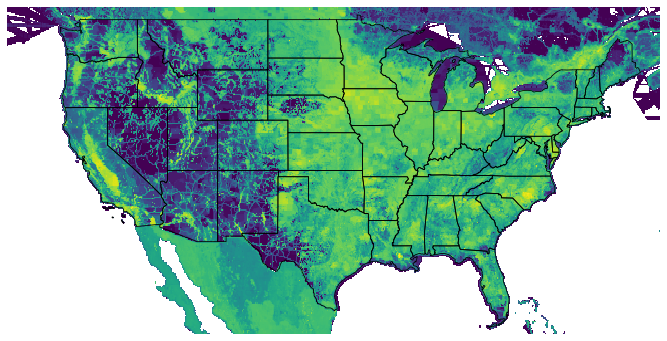

In [8]:
month = 6 # june

lon_min = 2300
lon_max = 2950
lon_range = lon_max-lon_min
lat_min = 1140
lat_max = 1400
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 12
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

lat_nudge = 1
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9),
            cmap=plt.cm.viridis)
#ax.grid(zorder=0)
#ax.set_ylabel('Latitude', fontsize=12)
#ax.set_xlabel('Longitude', fontsize=12)
ax.axis('off')

#davis_lat = 38.53
#davis_lon = -121.75
#ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=15) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)



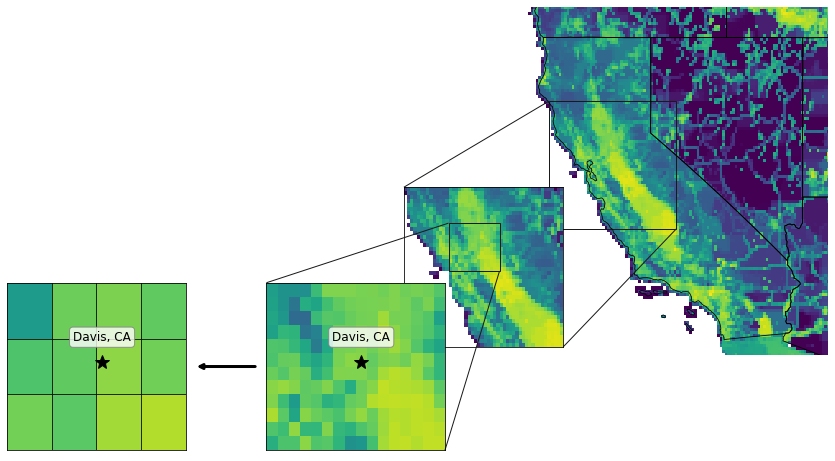

In [80]:
month = 6 # june

lon_min = 2340
lon_max = 2470
lon_range = lon_max-lon_min
lat_min = 1220
lat_max = 1330
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

lat_nudge = 1
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9),
            cmap=plt.cm.viridis)
#ax.grid(zorder=0)
#ax.set_ylabel('Latitude', fontsize=12)
#ax.set_xlabel('Longitude', fontsize=12)
ax.axis('off')


us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])


axins_state = zoomed_inset_axes(ax, 1.25, loc=2, bbox_to_anchor=(-.1, 0.5),bbox_transform=ax.figure.transFigure)

lon_min = 2360
lon_max = 2410
lon_range = lon_max-lon_min
lat_min = 1260
lat_max = 1300
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 0
lon_nudge = 1
axins_state.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))

mark_inset(ax, axins_state, loc1=2, loc2=4,  ec="0.1")

#axins.axis('off')
axins_state.set_xticks([])
axins_state.set_yticks([])

axins_regional = zoomed_inset_axes(axins_state, 3.5, loc='center', bbox_to_anchor=(-.2, .1),bbox_transform=ax.figure.transFigure)

lon_min = 2374
lon_max = 2390
lon_range = lon_max-lon_min
lat_min = 1279
lat_max = 1291
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 0
lon_nudge = 1
axins_regional.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))

mark_inset(axins_state, axins_regional, loc1=2, loc2=4,  ec="0.1")

#axins.axis('off')
axins_regional.set_xticks([])
axins_regional.set_yticks([])


davis_lat = 38.53
davis_lon = -121.75
axins_regional.plot(davis_lon, davis_lat, marker='*', c='k', markersize=15) # Davis
axins_regional.text(x=davis_lon, y=davis_lat+.18, s='Davis, CA', horizontalalignment='center',
                    verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=.8, edgecolor='gray', boxstyle='round'))


axins_regional_downscaled = zoomed_inset_axes(axins_regional, 1, loc='center', bbox_to_anchor=(-.8, .1),bbox_transform=ax.figure.transFigure)


# valid: 1 (no downscaling), 2 (~20x20km), 5 (50x50km), 10 (100x100km), etc.
divx = 4
divy = 4
# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 1
lon_nudge = 1
emiss_array = data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge]
reduced_res_emiss = reduce_res(emiss_array, divx, divy)

axins_regional_downscaled.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               reduced_res_emiss, 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))



axins_regional_downscaled.annotate('', xy=(1.40, .5), xycoords='axes fraction', xytext=(1.05, .5), 
            arrowprops=dict(arrowstyle="<-", color='k', lw=3))
axins_regional_downscaled.set_yticks([38.3, 38.7])
axins_regional_downscaled.set_xticks([-122.2, -121.8, -121.4])
axins_regional_downscaled.grid( color='k', axis='both')
axins_regional_downscaled.set_xticklabels([])
axins_regional_downscaled.set_yticklabels([])
axins_regional_downscaled.tick_params(left=False, bottom=False)

axins_regional_downscaled.plot(davis_lon, davis_lat, marker='*', c='k', markersize=15) # Davis
axins_regional_downscaled.text(x=davis_lon, y=davis_lat+.18, s='Davis, CA', horizontalalignment='center',
                    verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=.8, edgecolor='gray', boxstyle='round'))


plt.savefig(f'heterogeneity_scale_diagram.pdf', format='pdf', bbox_inches='tight')

Chicago

(40.04999923706055, 44.95000076293945)

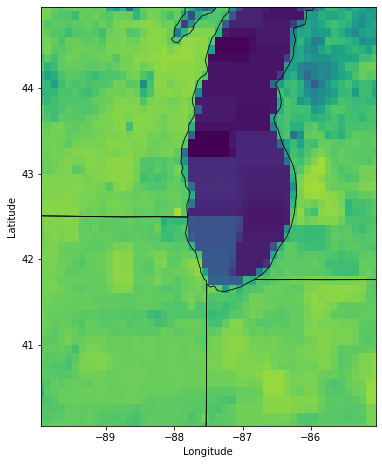

In [11]:
month = 6 # june

lon_min = 2700
lon_max = 2750
lon_range = lon_max-lon_min
lat_min = 1300
lat_max = 1350
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

lat_nudge = 1
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])

Southern California

(32.04999923706055, 38.95000076293945)

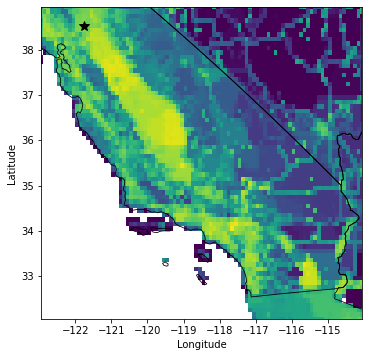

In [12]:
month = 6 # june

lon_min = 2370
lon_max = 2460
lon_range = lon_max-lon_min
lat_min = 1220
lat_max = 1290
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 0
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

davis_lat = 38.53
davis_lon = -121.75
ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=10) # Davis
#ax.plot(-117.55, 34.08, marker='*', c='k', markersize=4) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])

Los Angeles and San Diego

(32.04999923706055, 35.95000076293945)

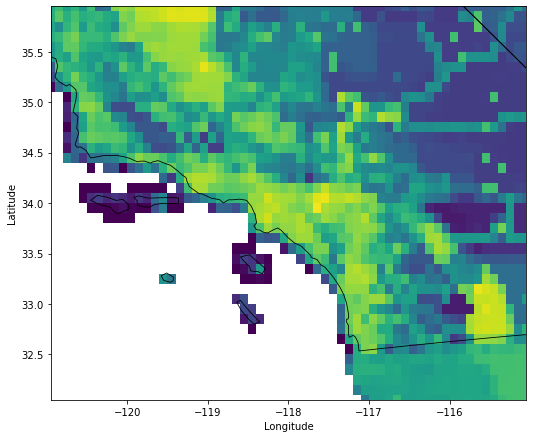

In [13]:
month = 6 # june

lon_min = 2390
lon_max = 2450
lon_range = lon_max-lon_min
lat_min = 1220
lat_max = 1260
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 9
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 1
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

davis_lat = 38.53
davis_lon = -121.75
ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=10) # Davis
#ax.plot(-117.55, 34.08, marker='*', c='k', markersize=4) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])

(-125.94999694824219,
 -113.05000305175781,
 32.04999923706055,
 42.95000076293945)

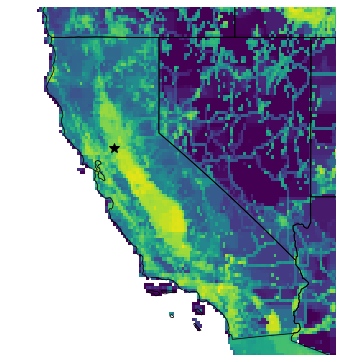

In [14]:
month = 6 # june

lon_min = 2340
lon_max = 2470
lon_range = lon_max-lon_min
lat_min = 1220
lat_max = 1330
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 0
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

davis_lat = 38.53
davis_lon = -121.75
ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=10) # Davis
#ax.plot(-117.55, 34.08, marker='*', c='k', markersize=4) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])
plt.axis('off')

Central California - approximate resolution is 11x11 km

(-123.94999694824219,
 -119.05000305175781,
 36.04999923706055,
 39.95000076293945)

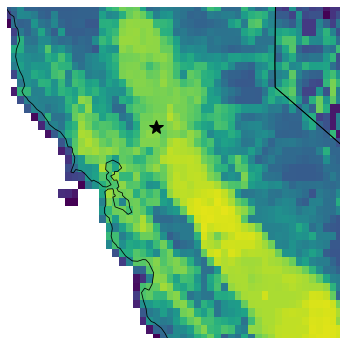

In [15]:
month = 6 # june

lon_min = 2360
lon_max = 2410
lon_range = lon_max-lon_min
lat_min = 1260
lat_max = 1300
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 1
lon_nudge = 1
plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge], 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

davis_lat = 38.53
davis_lon = -121.75
ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=15) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])
plt.axis('off')

Emissions resolution lowered to 50km x 50 km

(36.04999923706055, 39.95000076293945)

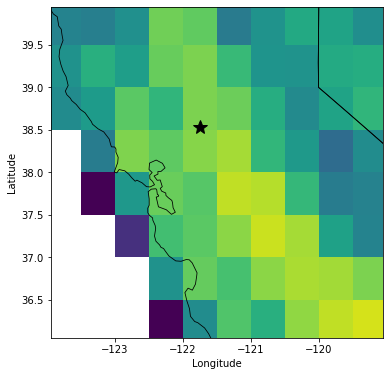

In [16]:
month = 6 # june

lon_min = 2360
lon_max = 2410
lon_range = lon_max-lon_min
lat_min = 1260
lat_max = 1300
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# valid: 1 (no downscaling), 2 (~20x20km), 5 (50x50km), 10 (100x100km), etc.
divx = 5
divy = 5
# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 1
lon_nudge = 1
emiss_array = data['emis_tot'][month-1, lat_min+lat_nudge:lat_max+lat_nudge, 
                                lon_min+lon_nudge:lon_max+lon_nudge]
reduced_res_emiss = reduce_res(emiss_array, divx, divy)

plt.pcolormesh(lon_mesh[lat_min:lat_max, lon_min:lon_max]-360, 
               lat_mesh[lat_min:lat_max, lon_min:lon_max], 
               reduced_res_emiss, 
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

davis_lat = 38.53
davis_lon = -121.75
ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=15) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-1]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])

In [17]:
import scipy

In [18]:
scipy.interpolate.interp2d(x=data['lon'][:].data, y=data['lat'][:].data, z=data['emis_tot'][month-1, :, :], kind='linear')

In [19]:
rect_spline = scipy.interpolate.RectBivariateSpline(y=data['lon'][:].data, x=data['lat'][:].data, z=data['emis_tot'][month-1, :, :], 
                                      #bbox=[None, None, None, None], 
                                      kx=2, ky=2, s=0)

In [20]:
data['emis_tot'][month-1, :, :].shape

(1800, 3600)

In [21]:
data['lon'][:].data.shape

(3600,)

In [22]:
from scipy.interpolate import RegularGridInterpolator

In [23]:
def interpolateEmissions(data, month, lon_min, lon_max, lat_min, lat_max, div_factor, interp_method):
    # Interpolation documentation
    # https://docs.scipy.org/doc/scipy/tutorial/interpolate/ND_regular_grid.html
    fit_points = [data['lat'][lat_min:lat_max].data, data['lon'][lon_min:lon_max].data]
    fit_data = data['emis_tot'][month-1, lat_min:lat_max, lon_min:lon_max]
    interp = RegularGridInterpolator(fit_points, fit_data, bounds_error=False)

    orig_res = .1
    div_factor = 2
    hi_res = orig_res/div_factor
    hires_lat = np.arange(data['lat'][lat_min:lat_max].data.min(), data['lat'][lat_min:lat_max].data.max()+1*hi_res, hi_res)
    hires_lon = np.arange(data['lon'][lon_min:lon_max].data.min(), data['lon'][lon_min:lon_max].data.max()+2*hi_res, hi_res)
    print(hires_lon.shape, hires_lat.shape)
    hires_lonmesh, hires_latmesh = np.meshgrid(hires_lon, hires_lat, indexing='ij')
    test_points = np.array([hires_latmesh.ravel(), hires_lonmesh.ravel()]).T

    interp_emiss = interp(test_points, method=interp_method).reshape(div_factor*lon_range, div_factor*lat_range)

    return hires_lonmesh, hires_latmesh, interp_emiss

Linearly interpolate the .1x.1 degree data to 0.05x0.05 degree 

(100,) (80,)


(36.04999923706055, 39.95000076293945)

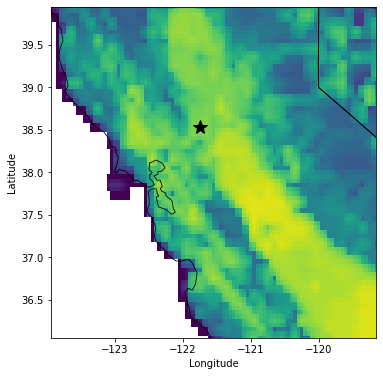

In [24]:
month = 6 # june

lon_min = 2360
lon_max = 2410
lon_range = lon_max-lon_min
lat_min = 1260
lat_max = 1300
lat_range = lat_max-lat_min

# Calculate aspect ratio using planar projection (width:height = 1:x where 
# x is determined via the cosine of the domain center latitude)
center_lat = lat_mesh[lat_min:lat_max, lon_min:lon_max].mean()
fig_width = 6
fig_scale = lon_range/fig_width
lat_scale_factor = fig_scale*np.cos(np.deg2rad(center_lat))
fig_height = lat_range/lat_scale_factor

hires_lonmesh, hires_latmesh, interp_emiss = interpolateEmissions(data, month=month, lon_min=lon_min, lon_max=lon_max, lat_min=lat_min, 
                                                                  lat_max=lat_max, div_factor=2, interp_method='linear')

fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))

# nudge the emissions grid slightly to line up nicely with the us shape file
lat_nudge = 1
lon_nudge = 1
plt.pcolormesh(hires_lonmesh-360, hires_latmesh, interp_emiss,
               norm=colors.LogNorm(vmin=1e-15, vmax=1e-9))
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

davis_lat = 38.53
davis_lon = -121.75
ax.plot(davis_lon, davis_lat, marker='*', c='k', markersize=15) # Davis

us49.boundary.plot(ax=ax, edgecolor='k', lw=.8)
ax.set_xlim(lon_mesh[lat_min, lon_min]-360, lon_mesh[lat_max, lon_max-2]-360)
ax.set_ylim(lat_mesh[lat_min, lon_min], lat_mesh[lat_max-1, lon_max])